# Predicción del precio del taxi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [53]:
train = pd.read_csv("../datasets/taxi_fare/train.csv", nrows=100000)
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [54]:
test = pd.read_csv("../datasets/taxi_fare/test.csv")
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [55]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Data preprocessing

In [56]:
train.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [57]:
train["dropoff_latitude"] = train["dropoff_latitude"].fillna(train.dropoff_latitude.mean())
train["dropoff_longitude"] = train["dropoff_longitude"].fillna(train.dropoff_longitude.mean())

In [58]:
train.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [59]:
train["year"] = [int(x[:4]) for x in train.pickup_datetime]
train["month"] = [int(x[5:7]) for x in train.pickup_datetime]
train["day"] = [int(x[8:10]) for x in train.pickup_datetime]
train["hour"] = [int(x[11:13]) for x in train.pickup_datetime]

train = train.drop(columns=["pickup_datetime"])
train.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7


In [60]:
train.dtypes

key                   object
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
day                    int64
hour                   int64
dtype: object

In [61]:
test["year"] = [int(x[:4]) for x in test.pickup_datetime]
test["month"] = [int(x[5:7]) for x in test.pickup_datetime]
test["day"] = [int(x[8:10]) for x in test.pickup_datetime]
test["hour"] = [int(x[11:13]) for x in test.pickup_datetime]

test = test.drop(columns=["pickup_datetime"])

In [62]:
train.drop("key", axis=1, inplace=True)
test.drop("key", axis=1, inplace=True)

In [63]:
train_term1 = train.dropoff_longitude - train.pickup_longitude
train_term2 = train.dropoff_latitude - train.pickup_latitude
train["euclidean_distance"] = np.sqrt(train_term1**2 + train_term2**2)

test_term1 = test.dropoff_longitude - test.pickup_longitude
test_term2 = test.dropoff_latitude - test.pickup_latitude
test["euclidean_distance"] = np.sqrt(test_term1**2 + test_term2**2)

train = train.drop(columns=["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])
test = test.drop(columns=["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])

train.head()

,fare_amount,passenger_count,year,month,day,hour,euclidean_distance
0,4.5,1,2009,6,15,17,0.009436
1,16.9,1,2010,1,5,16,0.079696
2,5.7,2,2011,8,18,0,0.013674
3,7.7,1,2012,4,21,4,0.025340
4,5.3,1,2010,3,9,7,0.019470


In [65]:
train_input = train.drop("fare_amount", axis=1)
train_target = train["fare_amount"]

#train_input[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]] = MinMaxScaler().fit_transform(train_input[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]])

In [66]:
train_input.head()

,passenger_count,year,month,day,hour,euclidean_distance
0,1,2009,6,15,17,0.009436
1,1,2010,1,5,16,0.079696
2,2,2011,8,18,0,0.013674
3,1,2012,4,21,4,0.025340
4,1,2010,3,9,7,0.019470


In [67]:
#test[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]] = MinMaxScaler().fit_transform(test[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]])
test.head()

,passenger_count,year,month,day,hour,euclidean_distance
0,1,2015,1,27,13,0.021554
1,1,2015,1,27,13,0.023180
2,1,2011,10,8,11,0.005870
3,1,2012,12,1,21,0.018649
4,1,2012,12,1,21,0.050631


In [68]:
x_data = np.array(train_input)
target = np.array(train_target)
x_test = np.array(test)

In [69]:
x_data.shape

(100000, 6)

In [103]:
x_train, x_val, y_train, y_val = train_test_split(x_data, target, test_size=0.1, random_state=101)

In [71]:
x_train.shape

(90000, 6)

### Creación del modelo

In [73]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam

In [118]:
model = Sequential()

model.add(Dense(units=256, input_dim=(x_data.shape[1]), activation="relu"))
model.add(BatchNormalization())

model.add(Dense(units=128, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(units=64, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(units=32, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(units=16, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(units=8, activation="relu"))
model.add(BatchNormalization())

# Última capa (predicción)
model.add(Dense(units=1))

In [119]:
model.compile(loss="mean_squared_error", optimizer=Adam(0.001), metrics=["mae"])

In [120]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               1792      
_________________________________________________________________
batch_normalization_31 (Batc (None, 256)               1024      
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_32 (Batc (None, 128)               512       
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_33 (Batc (None, 64)                256       
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
__________

### Entrenamiento

In [121]:
training = model.fit(x=x_train, 
                     y=y_train, 
                     batch_size=256, 
                     epochs=20, 
                     validation_data=(x_val[:300,], y_val[:300,]), 
                     verbose=1)

Train on 90000 samples, validate on 300 samples
Epoch 1/20
90000/90000 [==============================] - 13s 150us/step - loss: 196.8611 - mean_absolute_error: 10.1493 - val_loss: 8959.5639 - val_mean_absolute_error: 94.2680
Epoch 2/20
90000/90000 [==============================] - 5s 53us/step - loss: 88.1064 - mean_absolute_error: 6.2312 - val_loss: 690.0429 - val_mean_absolute_error: 24.8826
Epoch 3/20
90000/90000 [==============================] - 5s 56us/step - loss: 41.2054 - mean_absolute_error: 3.5680 - val_loss: 638.2925 - val_mean_absolute_error: 23.9049
Epoch 4/20
90000/90000 [==============================] - 5s 60us/step - loss: 34.2936 - mean_absolute_error: 3.2005 - val_loss: 2153.0827 - val_mean_absolute_error: 45.7231
Epoch 5/20
90000/90000 [==============================] - 5s 59us/step - loss: 33.1722 - mean_absolute_error: 3.1325 - val_loss: 621.6127 - val_mean_absolute_error: 23.5549
Epoch 6/20
90000/90000 [==============================] - 5s 57us/step - loss: 31

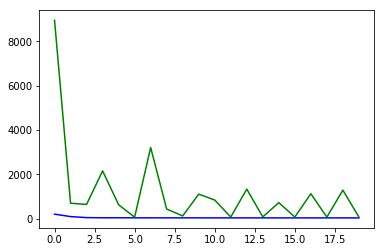

In [133]:
plt.plot(training.history["loss"], "b")
plt.plot(training.history["val_loss"], "g")